In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
DATASET_DIR = "dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,     # 80% train, 20% validation
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 435 files belonging to 4 classes.
Using 348 files for training.
Found 435 files belonging to 4 classes.
Using 87 files for validation.


In [4]:
normalization_layer = layers.Rescaling(1./255)


In [5]:
model = models.Sequential([

    # Normalize input images
    normalization_layer,

    # Convolution Layer 1
    layers.Conv2D(32, (3, 3), activation="relu",
                  input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),

    # Convolution Layer 2
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    # Convolution Layer 3
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    # Flatten feature maps
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(len(train_ds.class_names), activation="softmax")
])


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 5
    #EPOCHS
)


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 985ms/step - accuracy: 0.3060 - loss: 1.9143 - val_accuracy: 0.8851 - val_loss: 0.5821
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8673 - loss: 0.4674 - val_accuracy: 0.9540 - val_loss: 0.2473
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9713 - loss: 0.1107 - val_accuracy: 0.9770 - val_loss: 0.5624
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9942 - loss: 0.0320 - val_accuracy: 0.9770 - val_loss: 0.4981
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9919 - loss: 0.0175 - val_accuracy: 0.9770 - val_loss: 0.4187


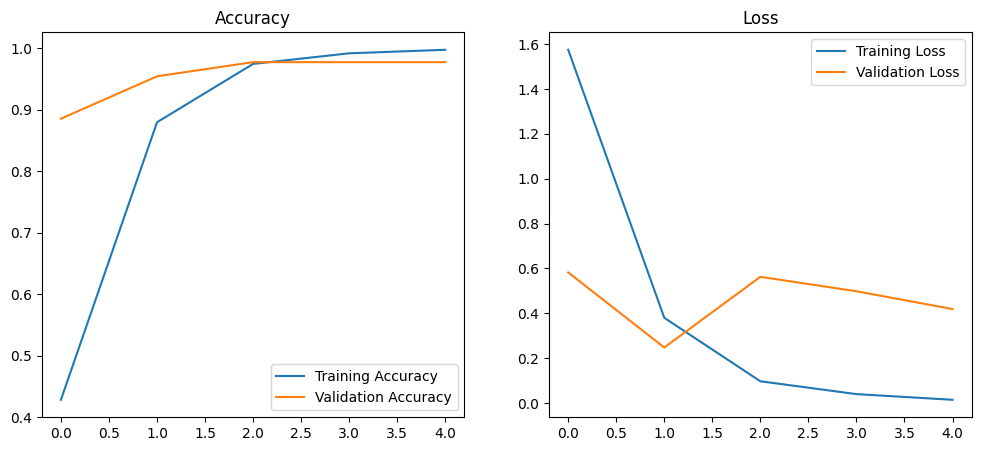

In [9]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()
